# Introduction

### Imports

In [20]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from nltk.corpus import stopwords
import time
from collections import Counter

from scipy.stats import bartlett, levene, boxcox, shapiro
from scipy.stats.mstats import winsorize

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LassoCV, ElasticNetCV, RidgeCV, Lasso, Ridge, ElasticNet
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

# Options for pandas
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Imports</a></span></li></ul></li></ul></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data</a></span></li><li><span><a href="#Dataset-Description" data-toc-modified-id="Dataset-Description-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataset Description</a></span></li><li><span><a href="#Null-Values" data-toc-modified-id="Null-Values-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Null Values</a></span></li><li><span><a href="#Explanatory-Features-Visualizations" data-toc-modified-id="Explanatory-Features-Visualizations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Explanatory Features Visualizations</a></span></li><li><span><a href="#Target-Variable-Visualization" data-toc-modified-id="Target-Variable-Visualization-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Target Variable Visualization</a></span></li><li><span><a href="#Target-Variable-Outliers" data-toc-modified-id="Target-Variable-Outliers-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Target Variable Outliers</a></span></li><li><span><a href="#Explanatory-vs.-Target-Variable-Visualizations" data-toc-modified-id="Explanatory-vs.-Target-Variable-Visualizations-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Explanatory vs. Target Variable Visualizations</a></span></li><li><span><a href="#Explanatory-Variable-Cleaning" data-toc-modified-id="Explanatory-Variable-Cleaning-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Explanatory Variable Cleaning</a></span><ul class="toc-item"><li><span><a href="#Condition-Mapping" data-toc-modified-id="Condition-Mapping-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Condition Mapping</a></span></li><li><span><a href="#Manufacturer/Model-Name" data-toc-modified-id="Manufacturer/Model-Name-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Manufacturer/Model Name</a></span></li><li><span><a href="#One-Hot-Encoded-Description-Words" data-toc-modified-id="One-Hot-Encoded-Description-Words-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>One-Hot Encoded Description Words</a></span></li><li><span><a href="#One-Hot-Encoded-Features" data-toc-modified-id="One-Hot-Encoded-Features-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>One-Hot Encoded Features</a></span></li><li><span><a href="#Initialize-Modeling-Dataframe" data-toc-modified-id="Initialize-Modeling-Dataframe-9.5"><span class="toc-item-num">9.5&nbsp;&nbsp;</span>Initialize Modeling Dataframe</a></span></li><li><span><a href="#Multicollinearity" data-toc-modified-id="Multicollinearity-9.6"><span class="toc-item-num">9.6&nbsp;&nbsp;</span>Multicollinearity</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Modeling</a></span></li><li><span><a href="#Evaluate-Best-Model" data-toc-modified-id="Evaluate-Best-Model-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Evaluate Best Model</a></span><ul class="toc-item"><li><span><a href="#Evaluating-Feature-Importance" data-toc-modified-id="Evaluating-Feature-Importance-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Evaluating Feature Importance</a></span></li></ul></li><li><span><a href="#Application-and-End-User-Value" data-toc-modified-id="Application-and-End-User-Value-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Application and End User Value</a></span></li></ul></div>

# Import Data

In [21]:
with open('data/clean_data/clean_board_source_data.json') as datafile:
    data = json.load(datafile)
board_source_df = pd.DataFrame(data)

with open('data/clean_data/clean_usb_data.json') as datafile:
    data = json.load(datafile)
usb_df = pd.DataFrame(data)

In [22]:
board_source_df = board_source_df.reset_index(drop=True)
usb_df = usb_df.reset_index(drop=True)

In [23]:
df = board_source_df.append(usb_df, sort=True)

print('Original Count', len(df))

Original Count 3419


# Dataset Description

This dataset consist of surfboards ads scraped from two online surf shop companies. The first surf shop is "Used Surfboards Hawaii" from Honolulu, Hawaii. The second company is "The Board Source" from Carlsbad, California. The features of the dataset are: condition, description word list, manufacturer, model name, board dimensions (height, width, and thickness), and sale price. The description word list is a processed version of the original description that is lowercased, stripped of punctuations, and split at white spaces. 

In [24]:
df.head()

,condition,description_word_list,height,manufacturer,model_name,price,thickness,width
0,excellent,"[this, board, is, in, excellent, condition, wi...",6.06,7s,superfish,325.0,2.7500,20.750
1,excellent,"[this, board, is, in, excellent, near, new, co...",6.02,wave tools,classic twin fin,525.0,3.1250,21.500
2,new,"[this, board, is, brand, new, the, new, superb...",5.10,superbrand,el slammo,475.0,2.6250,20.375
3,new,"[this, board, is, brand, new, fins, are, avail...",9.06,roy sanchez,crossroads,840.0,2.8750,22.750
4,new,"[this, board, is, brand, new, the, new, superb...",5.11,superbrand,the toy x,495.0,2.4375,19.375


# Null Values

There are two observations with null condition values. Luckily for those two observations the condition was stated within description word list column.

In [25]:
df.isnull().sum()/df.isnull().count()*100

condition                0.058497
description_word_list    0.000000
height                   0.000000
manufacturer             0.000000
model_name               0.000000
price                    0.000000
thickness                0.000000
width                    0.000000
dtype: float64

In [26]:
df.at[639, 'condition'] = 'good'
df.at[710, 'condition'] = 'excellent'

In [27]:
#drop column with string nulls

df = df[df['model_name'] != 'nan'].copy()

# Explanatory Features Visualizations

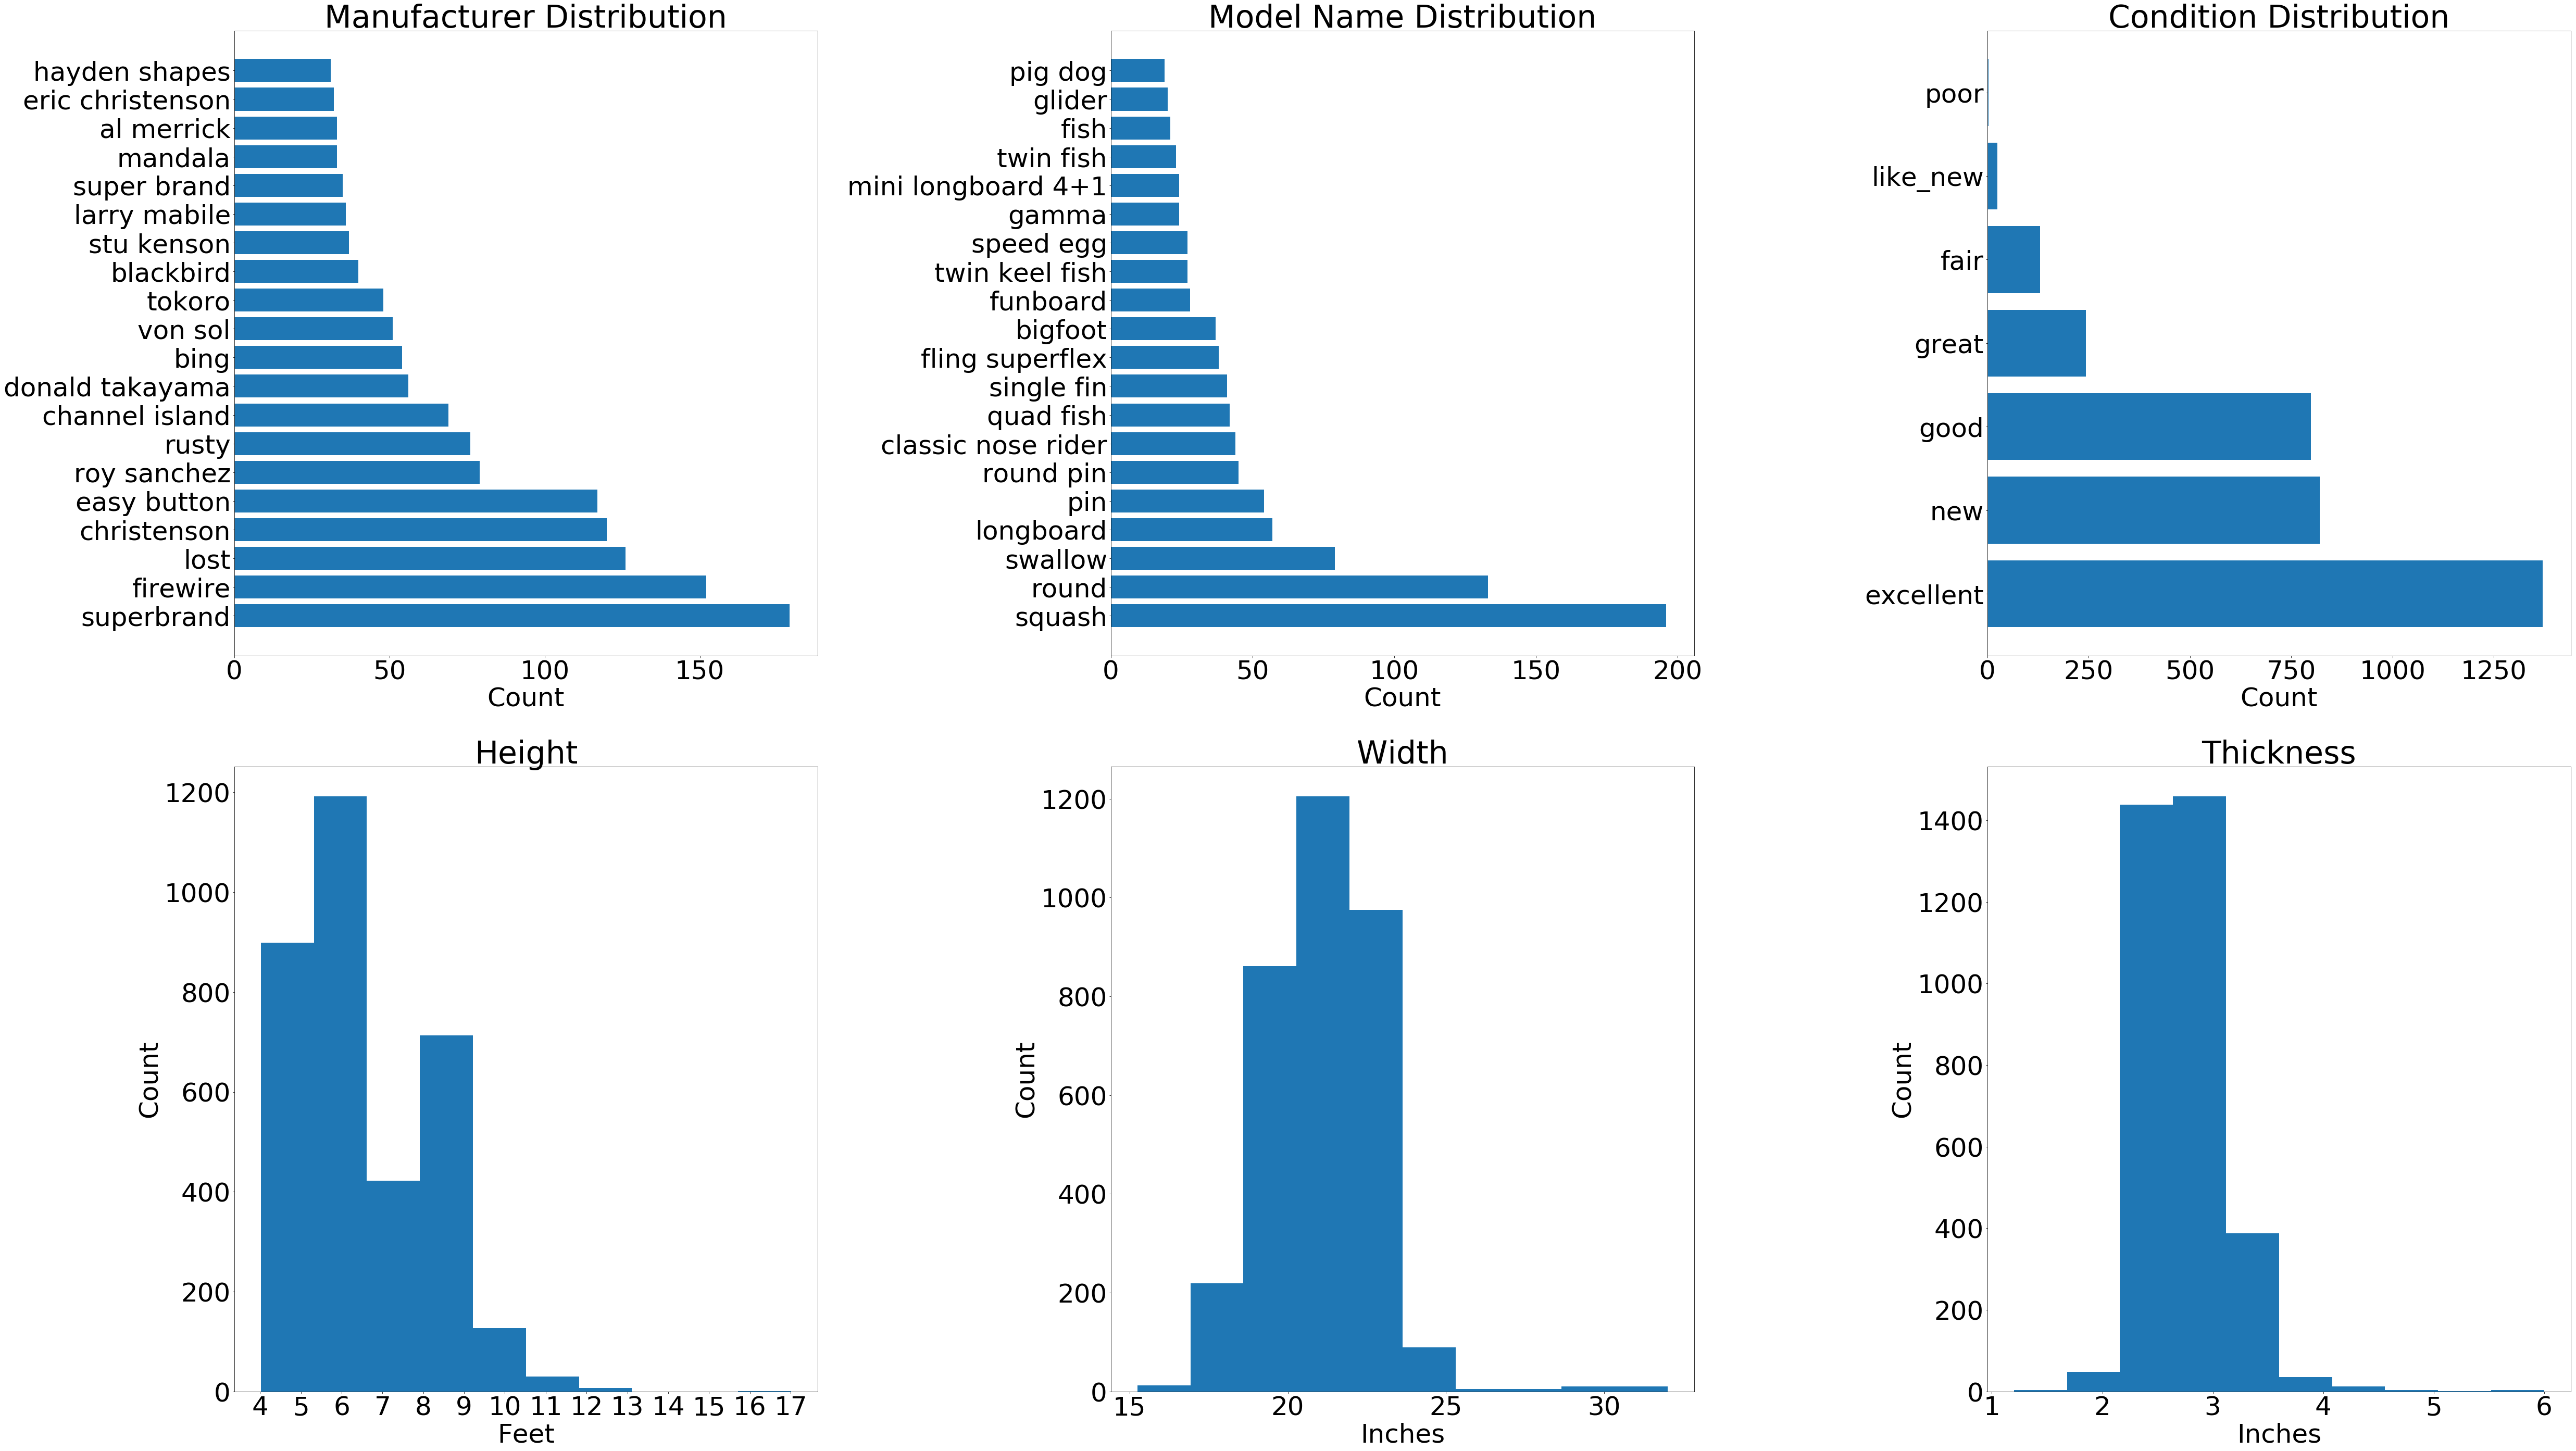

In [9]:
plt.figure(figsize=(70,40))
plt.rcParams.update({'font.size': 50})

plt.subplot(2,3,1)
plt.title('Manufacturer Distribution')
plt.xlabel('Count')
manufacturer_name = list(df['manufacturer'].value_counts().keys())[:20]
manufacturer_count = list(df['manufacturer'].value_counts().values)[:20]
plt.barh(manufacturer_name, manufacturer_count)

plt.subplot(2,3,2)
plt.title('Model Name Distribution')
plt.xlabel('Count')
model_name = list(df['model_name'].value_counts().keys())[:20]
model_count = list(df['model_name'].value_counts().values)[:20]
plt.barh(model_name, model_count)

plt.subplot(2,3,3)
plt.title('Condition Distribution')
plt.xlabel('Count')
condition_name = list(df['condition'].value_counts().keys())[:20]
condition_count = list(df['condition'].value_counts().values)[:20]
plt.barh(condition_name, condition_count)

plt.subplot(2,3,4)
plt.title('Height')
plt.xlabel('Feet')
plt.ylabel('Count')
plt.hist(df.height)
plt.xticks(np.arange(4,18,1))

plt.subplot(2,3,5)
plt.title('Width')
plt.xlabel('Inches')
plt.ylabel('Count')
plt.hist(df.width)

plt.subplot(2,3,6)
plt.title('Thickness')
plt.xlabel('Inches')
plt.ylabel('Count')
plt.hist(df.thickness)


plt.tight_layout()
plt.show()


Since there are 695 unique manufacturer and 1131 unique model names within this dataset, only the top 20 manufacturers and model names are displayed. There's five dominating manufacturers and three dominating model names.

As of the board dimension plots, majority of the surfboards are in the shortboard size range. Shortboards are smaller surfboards used for technical maneuvers on waves. Any board that's usually longer than eight feet, wider than 19 to 20 inches, and thicker than three inches is likely to fall under the longboard, gun, big wave gun, or SUP (stand-up paddleboard) category. Longboards are surfboards that are usually used by beginners or for less technical maneuvers on the wave, big wave guns like the name says are used for big waves, SUP are boards that surfers can stand on without the need of a wave and can be maneuvered with a paddle. 

The three dominating model names are considered surfboard tail shapes. Surfboard tails are located on the back of the surfboard opposite to the nose of the board. Surfboard tail shapes are not necessarily model names but an essential attribute of a surfboard. As you can see below, these particular model names are shared across multiple manufacturers. This will likely result in the regression models to find these general model names to be less important for predicting the surfboard's prices. 

In [10]:
#Group by top model names and manufacturer count
top_model_names = ['squash', 'round', 'swallow']

df.loc[(df['model_name'].isin(top_model_names))].groupby(['model_name', 'manufacturer']).size()


model_name  manufacturer             
round                                     1
            aipa  akila aipa              1
            al merrick                    1
            backdoor                      2
            bret                          1
            bret  brett                   1
            brett                         2
            brice                         1
            bushman                       4
            byrne                         1
            chilli                        2
            chris gallagher               1
            cole                          1
            d pang  dennis pang  pang     2
            d tatsuno                     1
            downing                       1
            eric arakawa                  7
            fg                            1
            firewire                      2
            goin                          2
            hawk surf                     1
            hayden shapes             

# Target Variable Visualization

The surfboard price distribution is skewed right. The distance between the 75th percentile and the max value is substantial. 

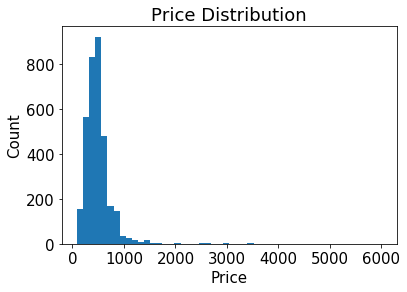

In [12]:
plt.rcParams.update({'font.size': 15})

plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.hist(df['price'], bins=50)
plt.show()

# Target Variable Outliers

Since regression models are sensitive to outliers, these outliers will either be winsorized or dropped. In this case, the outliers will be dropped since the majority of outliers are novelty or vintage surfboards. 

In [13]:
print('Previous Count: ', len(df))

df = df[df['price'] < 1000].copy()

print('Current Count: ', len(df))

Previous Count:  3391
Current Count:  3290


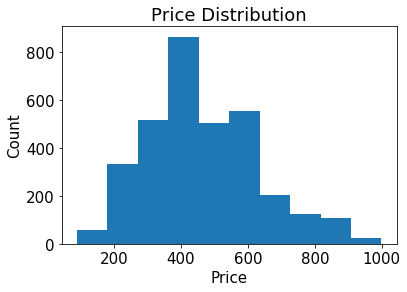

In [14]:
#New Distribution
plt.rcParams.update({'font.size': 15})

plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.hist(df['price'])
plt.show()

# Explanatory vs. Target Variable Visualizations

/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


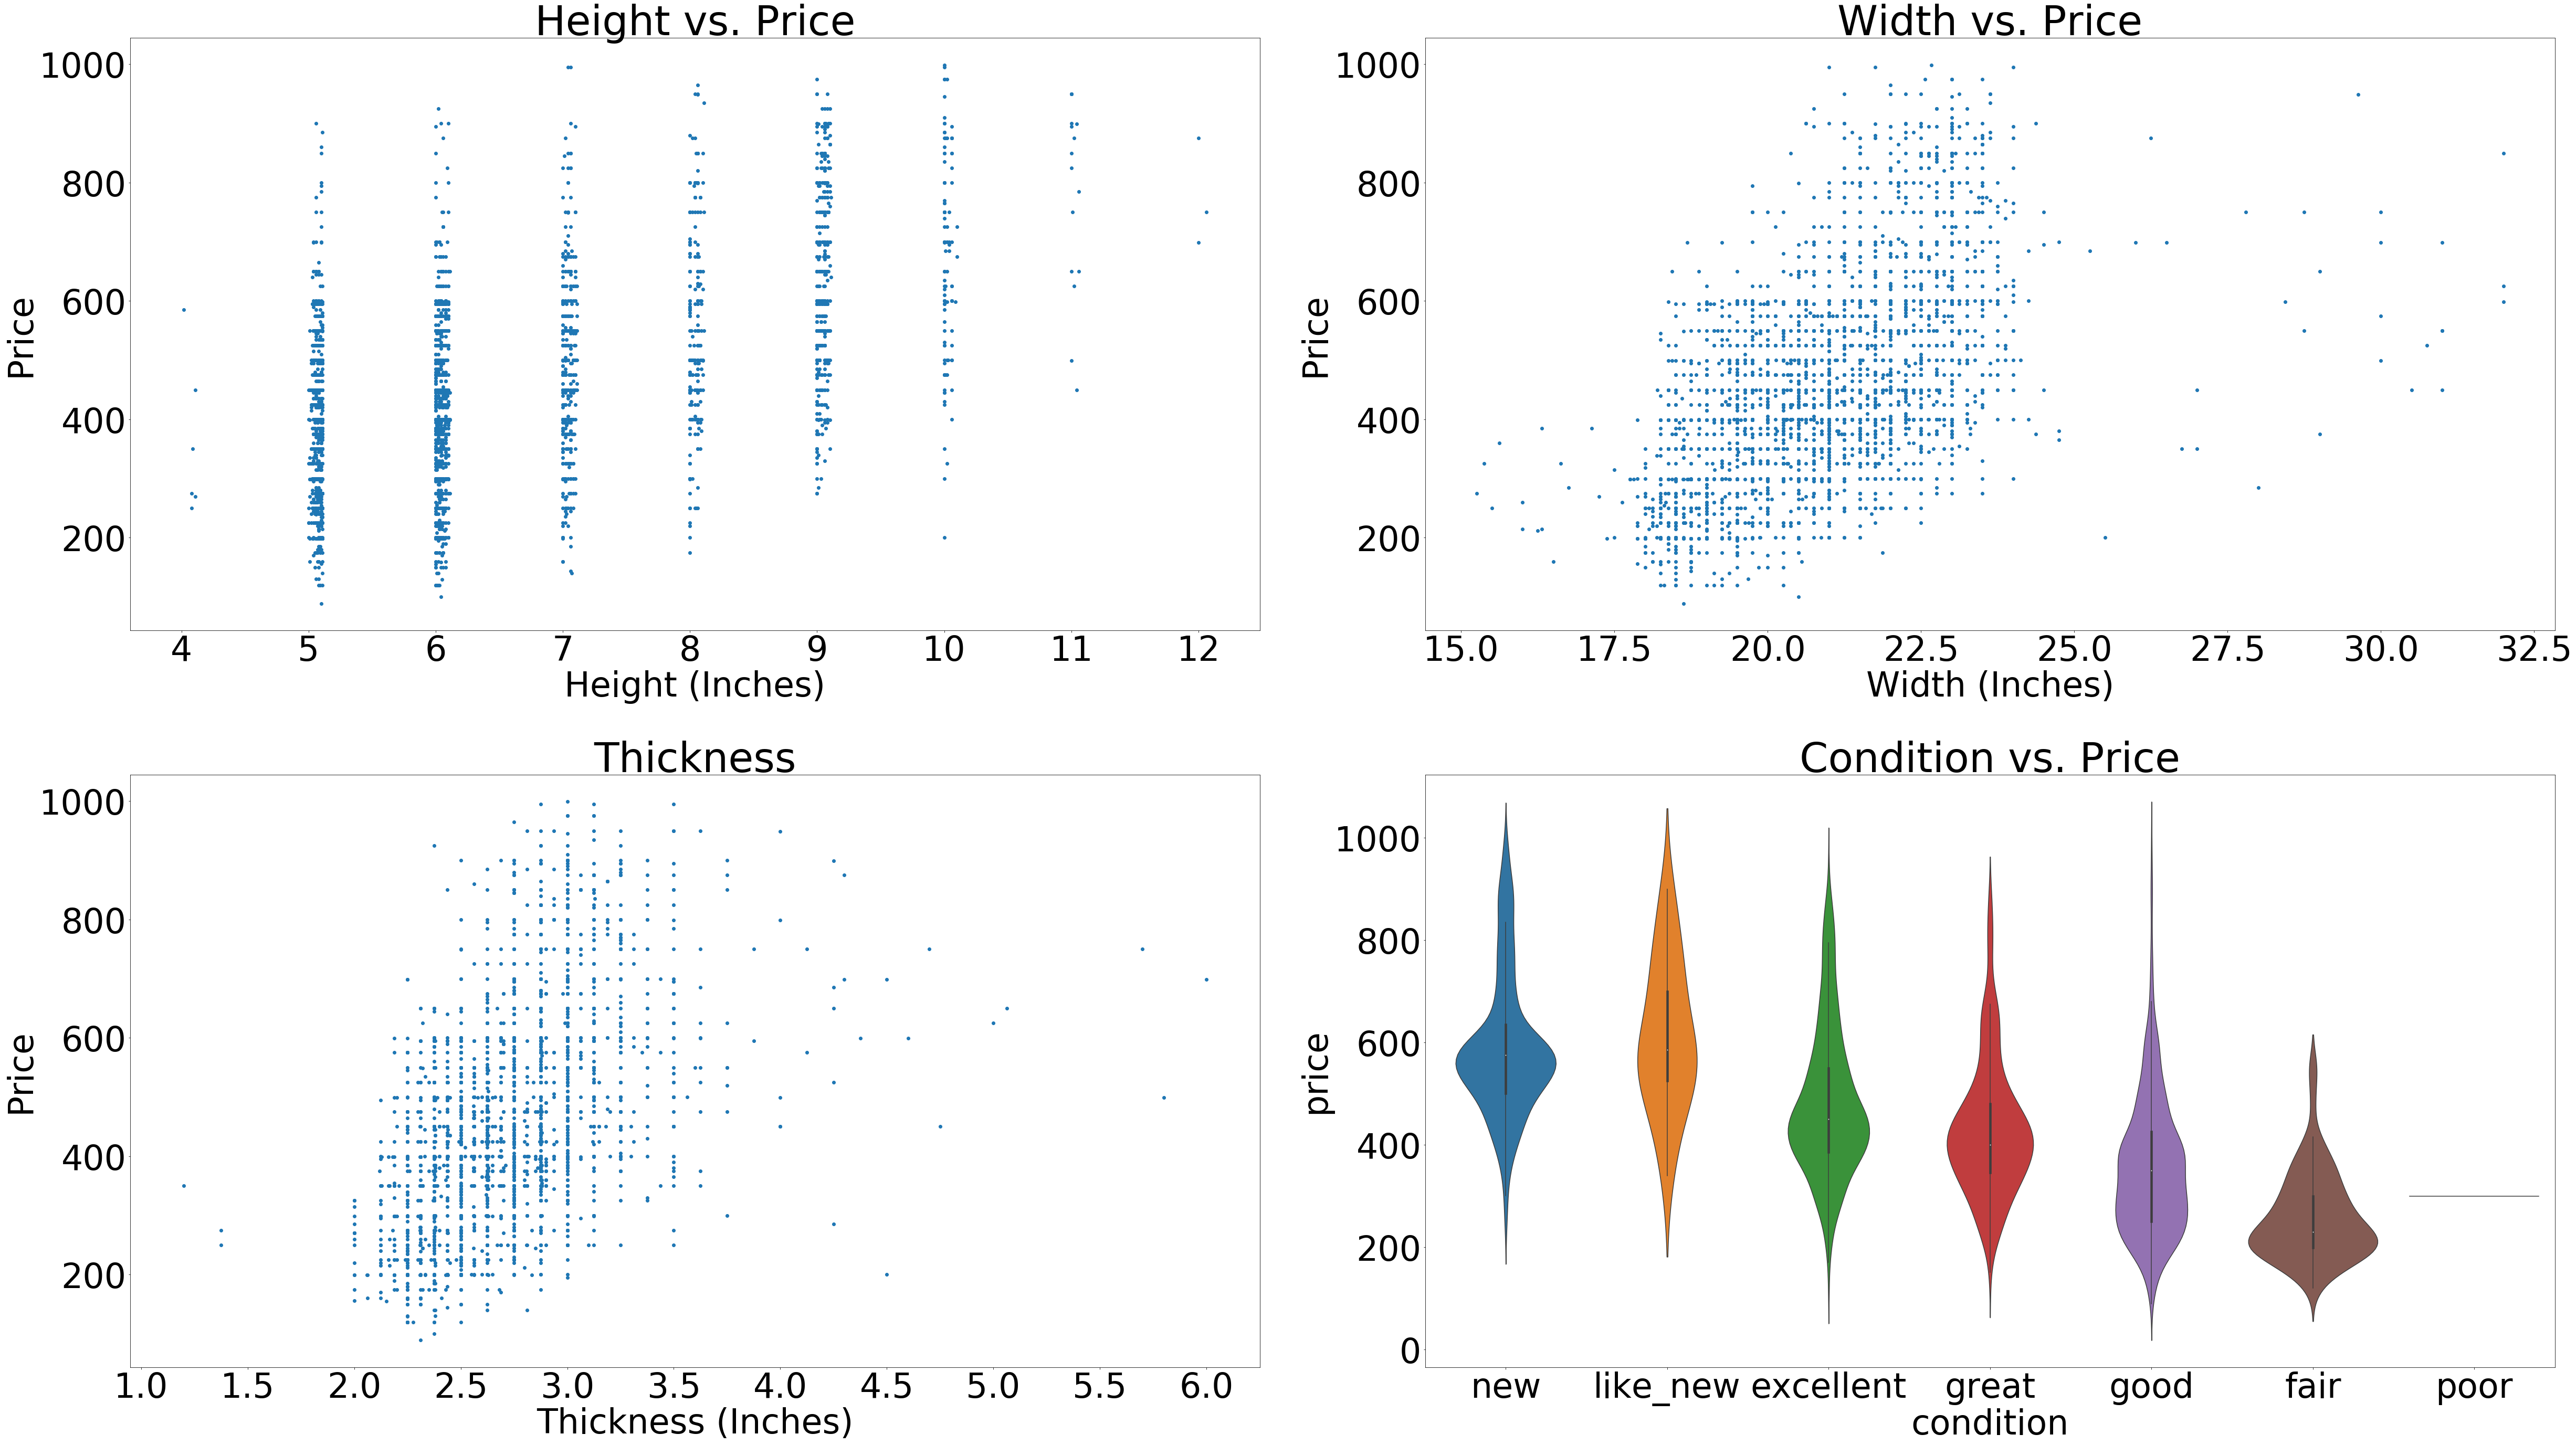

In [15]:
plt.figure(figsize=(70,40))
plt.rcParams.update({'font.size': 65})

plt.subplot(2,2,1)
plt.title('Height vs. Price')
plt.xlabel('Height (Inches)')
plt.ylabel('Price')
plt.xticks(np.arange(4,13,1))
plt.scatter(df['height'], df['price'])

plt.subplot(2,2,2)
plt.title('Width vs. Price')
plt.xlabel('Width (Inches)')
plt.ylabel('Price')
plt.scatter(df['width'], df['price'])

plt.subplot(2,2,3)
plt.title('Thickness')
plt.xlabel('Thickness (Inches)')
plt.ylabel('Price')
plt.xticks(np.arange(1,7,.5))
plt.scatter(df['thickness'], df['price'])

plt.subplot(2,2,4)
plt.title('Condition vs. Price')
sns.violinplot('condition', 'price', data=df, order=['new', 'like_new', 'excellent', 'great', 'good', 'fair', 'poor'])

plt.tight_layout()
plt.show()


In [16]:
df.corr()

,height,price,thickness,width
height,1.000000,0.538571,0.703030,0.686652
price,0.538571,1.000000,0.479994,0.525641
thickness,0.703030,0.479994,1.000000,0.800612
width,0.686652,0.525641,0.800612,1.000000


Looking at the scatter plots and correlation coefficient matrix above, there's is a moderately strong positive correlation between all board dimension features and price. This is especially the case with surfboard that are categorized under longboards or SUP. Longboards and SUPs are usually larger in all aspects. This results in higher material cost compared to smaller surfboards. 

Like any product, we can see that the better the surfboard condition the higher the price. Although in the good condition plot there are boards that are priced higher than better condition boards. These are likely to be better quality surfboards or novelty surfboards that hold their value. 

# Explanatory Variable Cleaning

## Condition Mapping

The majority of surfboards are in excellent condition while a minority of surfboards are in poor to fair condition. The condition of the surfboard will likely be an important feature for predicting the respective surfboard price. Since like new and excellent are arguably the same and there is a small sample of like new surfboards, like new surfboards will be mapped to the excellent category.

In [17]:
df['condition'] = df['condition'].apply(lambda x: 'excellent' if x == 'like_new' else x)

In [18]:
df['condition'].value_counts()

excellent    1344
good          793
new           779
great         241
fair          130
poor            3
Name: condition, dtype: int64

## Manufacturer/Model Name

While interpreting the model's coefficients, I've found that the one-hot encoded manufacturers features were important features for determining price. Less frequent manufacturers surfboards had larger residuals compared to more frequent manufacturer surfboards. To reduce the loss for each model, the cell below filters out manufacturer with surfboard counts below a defined threshold. In a real world application this wouldn't be advised and the minority class of data would be kept on the side until the respective minority class's count reaches a defined threshold. For the sake of this project, the minority manufacturers will be dropped and the minority model names will be mapped to other. Since 55% of manufacturer counts are one, creating synthetic data would be unreliable. 

In [19]:
df['model_name'] = df['model_name'].apply(lambda x: x.replace(' ', '_'))
df['manufacturer'] = df['manufacturer'].apply(lambda x: x.replace(' ', '_'))

In [20]:
print('Previous Count: ', len(df))

Previous Count:  3290


In [21]:
threshold = 20
minority_manufacturer_list = []

for manufacturer, count in df.groupby('manufacturer').size().items():
    if count <= threshold:
        minority_manufacturer_list.append(manufacturer)

# df['manufacturer'] = df['manufacturer'].apply(lambda x: 'other' if x in minority_manufacturer_list else x)
df = df[~df['manufacturer'].isin(minority_manufacturer_list)].copy()

In [22]:
print('Current Count: ', len(df))

Current Count:  1646


In [23]:
threshold = 20
minority_model_name_list = []

for model_name, count in df.groupby('model_name').size().items():
    if count <= threshold:
        minority_model_name_list.append(model_name)

df['model_name'] = df['model_name'].apply(lambda x: 'other' if x in minority_model_name_list else x)
# df = df[~df['model_name'].isin(minority_model_name_list)].copy()

## One-Hot Encoded Description Words

One-Hot Encode surfboard terms within the description feature that are strongly correlated with surfboard price. 

Negatively Correlated Terms:
    - Ding/Dent: Dent in surfboard usually causing the surfboard's outer shell (fiberglass) to crack. 
    - Pressure Ding/Dent: Less severe form of a regular surfboard ding without cracking the fiberglass
    - Professionally fixed ding: Ding repair is sanded flush with board (won't cause board to drag), water tight,  and no air bubbles
    
Positive Correlated Terms:
    - SUP (Stand up Paddle Board)
    - Longboard (surfboard height >= ~8')
    - Hydro foil (Google it)
    - No dings (no dents)
    - Epoxy (Type of material used with surfboard) 

In [24]:
#used to create ngrams of description word list
def ngram(text, n_gram):
    n_gram_list = []
    for i in range(len(text)-n_gram):
        text_seq = ' '.join(text[i:i+n_gram])
        n_gram_list.append(text_seq)
    unique_ngram_list = list(np.unique(n_gram_list))
    return unique_ngram_list

In [25]:
trigram_list = ['professionally fixed dings', 'professionally fixed ding', 'professionally repaired dings',
                'light pressure dents', 'minor pressure denting', 'minimal pressure dents', 
                'minimal pressure denting','various pressure dents']

bigram_list = ['repaired dings', 'repaired ding', 'pressure dents', 'pressure dent', 
               'nose ding', 'rail ding', 'cracked fin', 'no dings', 'deck patch']

unigram_list = ['sup', 'longboard', 'hydrofoil', 'epoxy', 'shortboard', 'fish', 'gun', 'semi-gun']

In [26]:
#create tri/bigram columns for matching one hot encoded words in description

df['trigram_description_list'] = df['description_word_list'].apply(lambda x: ngram(x, 3))
df['bigram_description_list'] = df['description_word_list'].apply(lambda x: ngram(x, 2))

In [27]:

#init df for one-hot encoded description words
description_one_hot_df = pd.DataFrame(index=range(len(df)))

#ngram words to be one hot encoded
gram_nested_list = [unigram_list, bigram_list, trigram_list]

#ngram columns to look up gram words
column_gram_list = ['description_word_list', 'bigram_description_list', 'trigram_description_list']

#init gram dict
gram_dict = dict(zip(column_gram_list, gram_nested_list))

#loop through gram columns to lookup one hot encoded ngrams
for column_gram, gram_list in gram_dict.items():
    for i,word_list in enumerate(df[column_gram]):
        for gram in gram_list:
            if gram in word_list:
                underscore_gram = gram.replace(' ', '_')
                description_one_hot_df.at[i, 'DV_'+underscore_gram] = 1
description_one_hot_df.fillna(0, inplace=True)
        

## One-Hot Encoded Features

There is a strong multicollinearity between manufacturer and model name. Combining manufacturer and model name followed by one-hot encoding eliminated multicollinearity and reduced RMSE. 

In [28]:
# #combine terms for each observation
# df['manufacturer_model_name'] = df['manufacturer'] + '_' + df['model_name']

#one-hot encode
one_hot_df = pd.get_dummies(df[['condition', 'manufacturer', 'model_name']]).reset_index(drop=True)

# one_hot_df = pd.get_dummies(df[['condition', 'manufacturer_model_name']]).reset_index(drop=True)

## Initialize Modeling Dataframe

In [29]:
df.reset_index(drop=True, inplace=True)

#columns with continous values
continous_df = df[['height', 'width', 'thickness', 'price']].copy()

#columns with one-hot description words
description_one_hot_df.reset_index(drop=True, inplace=True)

#create dataframe with features that will be used for modeling

model_df = continous_df.join(one_hot_df).join(description_one_hot_df)

data_x = model_df[model_df.columns[~model_df.columns.isin(['price'])]]
data_y = model_df['price']

## Multicollinearity 

In [30]:
corr = data_x.corr()
multicollinearity_count = 0

for col1 in corr:
    for col2 in corr[1:]:
        val = corr[col1][col2]
        if .8 <= abs(val) < 1:
            print('Multicollinearity between {} and {} ... {}'.format(col1, col2, val))
            multicollinearity_count += 1
print()
print('Multicollinearity_count: ', multicollinearity_count)

Multicollinearity between manufacturer_firewire_slater_designs and model_name_gamma ... 0.9786433788724607
Multicollinearity between model_name_gamma and manufacturer_firewire_slater_designs ... 0.9786433788724607

Multicollinearity_count:  2


Dropping one of multicollinear features isn't neccessary since the multicollinearity is due to the lack of other model names from firewire slater designs. Eventually multicollinearity will decrease between these two features as different surfboard models from firewire slater designs is added to the dataset. 

# Modeling

In [43]:
# Optimize hyperparameters for each model and add metrics results to model results dataframe

def model_results(model_list, train_x, train_y, test_x, test_y, x_cols):
    
    model_dict = []
    best_model_dict = {}
    
    for name, model in model_list.items():
        print(name)
        model_metrics = {}
        model = GridSearchCV(model, model.parameters, cv=3)
        
        model.fit(train_x, train_y)
        
        pred_y = model.predict(test_x).reshape(-1)
        
        model_metrics['r2'] = model.score(test_x, test_y)
        model_metrics['root_MSE'] = np.sqrt(mse(test_y, pred_y))
        model_metrics['MAE'] = np.abs(test_y - pred_y).mean()
        model_metrics['MAPE'] = (np.abs(test_y - pred_y) / test_y).mean() * 100
        model_metrics['model_name'] = name
        
        model_dict.append(model_metrics)
        best_model_dict[name] = model.best_estimator_
            
    model_results_df = pd.DataFrame(model_dict).set_index('model_name')

    return best_model_dict, model_results_df

In [44]:
standard_s = StandardScaler()
data_x_cols = data_x.columns
normalized_data_x = standard_s.fit_transform(data_x)
train_x, test_x, train_y, test_y = train_test_split(normalized_data_x, data_y, test_size=.2)

#hyper parameter testing attributes

alpha_dict = {'alpha': [.001,.01,.1,1]}

elastic = ElasticNet()
elastic.parameters = alpha_dict

lasso = Lasso()
lasso.parameters = alpha_dict

ridge = Ridge()
ridge.parameters = alpha_dict

mlp = MLPRegressor()
mlp.parameters = {'hidden_layer_sizes': [(100,50,25)],
                  'alpha': [.01,.1,1],
                  'learning_rate': ['adaptive'],
                  'solver': ['adam']}

rf = RandomForestRegressor()
# rf.parameters = {'n_estimators': [10, 50, 200],
#                  'max_depth': [2,4,8,16],
#                  'max_features': ['sqrt', 'auto', ],
#                  'min_samples_split': [2, 4, 8, 16],
#                  'min_samples_leaf': [1, 2, 4, 8, 16]}
rf.parameters = {'n_estimators': [50],
                 'max_depth': [32],
                 'max_features': ['sqrt'],
                 'min_samples_split': [2],
                 'min_samples_leaf': [1]}

svr = SVR()
# svr.parameters = {'C': [1, 10, 100, 1000],
#                   'gamma': [.001, .01, .1, .5, .9]}
svr.parameters = {'C': [1000],
                  'gamma': [.001, .01, .1, .5, .9]}

pls = PLSRegression()

pls.parameters = {'n_components': [2,4,8,16]}

model_list = {'elastic': elastic, 'ridge': ridge, 'lasso': lasso, 'mlp': mlp, 'rf': rf, 'svr': svr, 'pls': pls}


best_model_dict, model_results_df = model_results(model_list, train_x, train_y, test_x, test_y, data_x_cols)

model_results_df

elastic


/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with ver

ridge
lasso


/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: Conv

mlp


/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

rf
svr
pls


,MAE,MAPE,r2,root_MSE
model_name,,,,
elastic,63.060235,14.580958,0.723293,83.575295
ridge,63.163865,14.597688,0.725480,83.244331
lasso,62.544287,14.415579,0.732136,82.228924
mlp,60.058559,14.295545,0.727214,82.980964
rf,57.500031,13.811668,0.752515,79.039050
svr,59.019006,13.968239,0.719468,84.150947
pls,63.074457,14.570312,0.725222,83.283332


The best model in regards to all metrics, was the random forrest model. In close second was the support vector model. The difference between the RMSE and MAE is surprisingly small. This generally means that there wasn't a lot of cases where the L2 loss had to penalize large errors. The random forrest model explained 73% of all variability in predicting price according to it's respective R2 score. 

# Evaluate Best Model

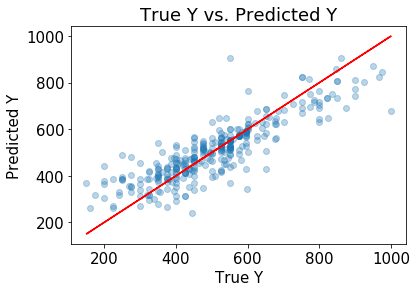

5-Fold Cross Validation:  [49.4671242  57.26611581 55.45569589 65.62559678 90.82219556]
AVG MAE Cross Validation:  63.727345646809724


In [46]:
best_model_dict['rf'].fit(train_x, train_y)
pred_y = best_model_dict['rf'].predict(test_x)

plt.rcParams.update({'font.size': 15})
plt.scatter(test_y, pred_y, alpha=.3)
plt.plot(test_y, test_y, color='red')
plt.title('True Y vs. Predicted Y')
plt.xlabel('True Y')
plt.ylabel('Predicted Y')
plt.show()

cross_val_mae = cross_val_score(best_model_dict['rf'], data_x, data_y, scoring='neg_mean_absolute_error', cv=5) * -1
print('5-Fold Cross Validation: ', cross_val_mae)
print('AVG MAE Cross Validation: ', cross_val_mae.mean())

Looking at the plot above, the random forrest model seems to predict well with surfboard in the \\$400 to \\$600 dollar range. For boards with a true price below \\$600, the model seems to overestimate the price. 

Within the 5-fold cross validation MAE, the model performed well in the first three folds compared to the last two folds. Variability in MAE is somewhat small with the exception of the last fold. 

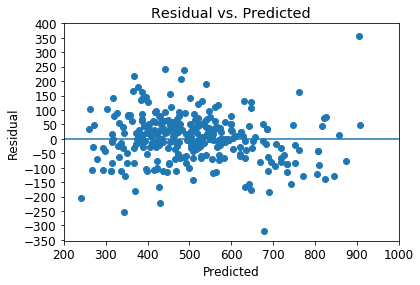

Bartlett t-test: 72.2627 ... P-value: 1.88e-17
Levene t-test: 64.4288 ... P-value: 4.61e-15


In [59]:
error_term = pred_y - test_y

plt.rcParams.update({'font.size': 12})
plt.scatter(pred_y, error_term)
plt.axhline(y=0)
plt.xticks(np.arange(200,1100,100))
plt.yticks(np.arange(-350,450,50))
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual vs. Predicted')
plt.show()

bart_stats = bartlett(pred_y, error_term)
lev_stats = levene(pred_y, error_term)

print("Bartlett t-test: {0:3g} ... P-value: {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene t-test: {0:3g} ... P-value: {1:.3g}".format(lev_stats[0], lev_stats[1]))

According to both t-test above, the error term is not homogeneous. This meaning that the regression line is not equally balanced between positive and negative residuals. 

In [60]:
error_term_df = model_df.copy()

error_term_df['error_term'] = error_term

error_term_df[abs(error_term_df['error_term']) > 200]

,height,width,thickness,price,condition_excellent,condition_fair,condition_good,condition_great,condition_new,condition_poor,manufacturer_al_merrick,manufacturer_bing,manufacturer_blackbird,manufacturer_campbell_brothers,manufacturer_channel_island,manufacturer_christenson,manufacturer_donald_takayama,manufacturer_easy_button,manufacturer_eric_arakawa,manufacturer_eric_christenson,manufacturer_firewire,manufacturer_firewire_slater_designs,manufacturer_gary_hanel,manufacturer_hayden_shapes,manufacturer_larry_mabile,manufacturer_lost,manufacturer_mandala,manufacturer_maurice_cole,manufacturer_minami,manufacturer_mitsven,manufacturer_pang,manufacturer_pyzel,manufacturer_rob_machado,manufacturer_roy_sanchez,manufacturer_rusty,manufacturer_stu_kenson,manufacturer_super_brand,manufacturer_superbrand,manufacturer_tokoro,manufacturer_von_sol,manufacturer_zen_surfboards,model_name_bigfoot,model_name_classic_nose_rider,model_name_fling_superflex,model_name_gamma,model_name_mini_longboard_4+1,model_name_other,model_name_round,model_name_speed_egg,model_name_squash,DV_shortboard,DV_fish,DV_longboard,DV_epoxy,DV_hydrofoil,DV_gun,DV_no_dings,DV_cracked_fin,DV_deck_patch,DV_pressure_dent,DV_pressure_dents,DV_repaired_dings,DV_repaired_ding,DV_nose_ding,DV_rail_ding,DV_professionally_fixed_dings,DV_professionally_fixed_ding,DV_professionally_repaired_dings,DV_light_pressure_dents,DV_minimal_pressure_dents,DV_various_pressure_dents,DV_minimal_pressure_denting,error_term
63,6.05,21.000000,3.0000,275.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.073333
300,6.08,20.250000,2.5000,200.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241.525115
883,9.00,22.250000,2.8750,550.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356.300000
1000,8.00,21.850000,2.8100,250.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,237.300000
1032,5.04,20.500000,2.5000,650.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-220.700000
1140,5.08,19.500000,2.3125,150.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,217.800000
1455,5.08,18.500000,2.2500,445.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-203.880000
1489,6.01,20.625000,2.6875,599.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-254.460000
1595,10.00,22.666667,3.0000,999.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-319.516667


Looking at the explanatory and target variables of surfboards with residuals greater than 200, the only common pattern is that good condition boards with true prices of \\$445 to \\$999 are underestimated. 

In [61]:
# get sum of one-hot encoded manufacturers and model names for observations with resiudals > 200

sum_col = error_term_df[abs(error_term_df['error_term']) > 200].iloc[:, 9:-24].sum()
sum_col[sum_col > 0]

manufacturer_al_merrick     1
manufacturer_blackbird      1
manufacturer_christenson    1
manufacturer_mandala        1
manufacturer_mitsven        1
manufacturer_roy_sanchez    1
manufacturer_rusty          1
manufacturer_superbrand     1
manufacturer_tokoro         1
model_name_other            8
dtype: int64

In [62]:
# pct of model names under "other" category
len(model_df[model_df['model_name_other'] == 1])/len(model_df)*100

83.23207776427704

The most common model name for observations with residuals greater than 200 is other. This is understandable since 83% of observations have a model name of other.

## Evaluating Feature Importance 

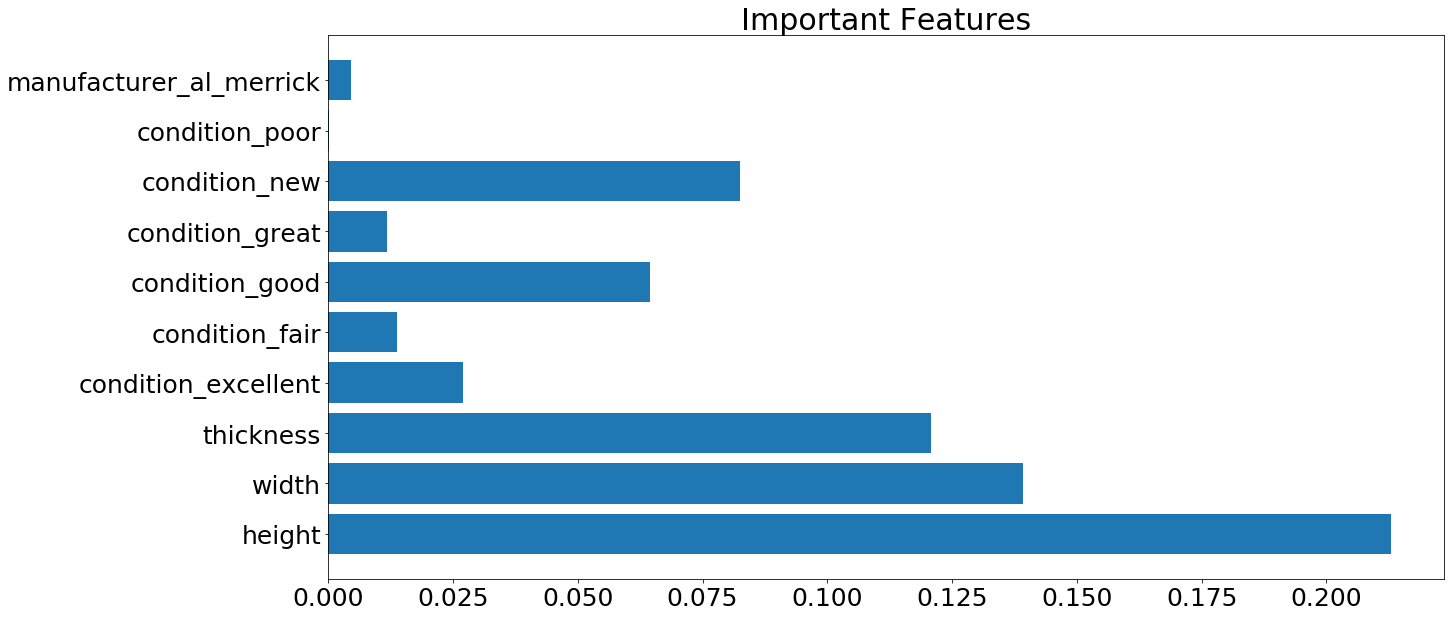

In [64]:
# Top 10 most important random forest features
rf_feature_importance_dict = dict(zip(data_x.columns[:10], best_model_dict['rf'].feature_importances_[:10]))

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 25})
plt.title('Important Features')
plt.barh(list(rf_feature_importance_dict.keys()), list(rf_feature_importance_dict.values()))

plt.show()

The most important features are the board dimensions and condition features. The strong importance for board dimensions is justified given that the bigger the board the higher the material cost. Obviously the better the condition the higher the price. If the expensive vintage novelty boards were incorporated into modeling than the condition coefficients may of been weaker given that vintage boards keep their value even if the condition of the board is lacking. 

# Application and End User Value

Surf Shops:

The Random forest model would be trained only with data from one surf shop since surf shops will have different opinions on prices. The model can be a feature on the respective surf shop website. If there is a sparse amount of higher value surfboards the model will only be used for predicting mid-range priced boards until there is a reasonable amount of higher end boards the model can train on. 

Surfboard Seller:

Users can enter their surfboard information and use the predicted surfboard price to determine if they want to sell their surfboard at that specific surf shop or use it as a reference price for selling their board at other surf shops. 

User Experience:

User access predictive surfboard price via surf shop's website/app:

User input (drop-down list):
- Board Dimensions (height, width, thickness)
- Condition (poor, fair, good, excellent, new)
- Manufacturer
- Model Name
- Type of board (shortboard, longboard, SUP)
- How many fixed dings are there? 
    - For each ding select size of ding:
        - Small (<= 1 square inches)
        - Medium (<= 6 square inches)
        - Large (=> 6 square inches)
- How many unfixed dings are there?

Product Output: Predicted surfboard price
